# ResNet Training

### 1. 데이터셋
- cifar10
- class 10 / train 6000 & test 1000

### 2. 모델
- ResNet18

### 3. Loss Function
- CrossEntropy(LabelSmoothing)

### 4. Optimizer
- SGD

### 5. Other Hyperparameters
- Batch size
- Epoch
- learning rate

### Step 1: Import requirements

In [ ]:
import os
import numpy as np
# from tqdm import tqdm
from tqdm.auto import tqdm

import torch
# import torch.nn.init as init
# import torch.backends.cudnn as cudnn
from torchvision import datasets, models
import torchvision.transforms as transforms
# import torch.nn.functional as F

### Step 2: Dataset Load


#### dataset transform
- Resize
- ToTensor
- Normalize
- CenterCrop
- RandomHorizontalFlip
- RandomRotation
- Grayscale
- GaussianBlur
- Compose
...

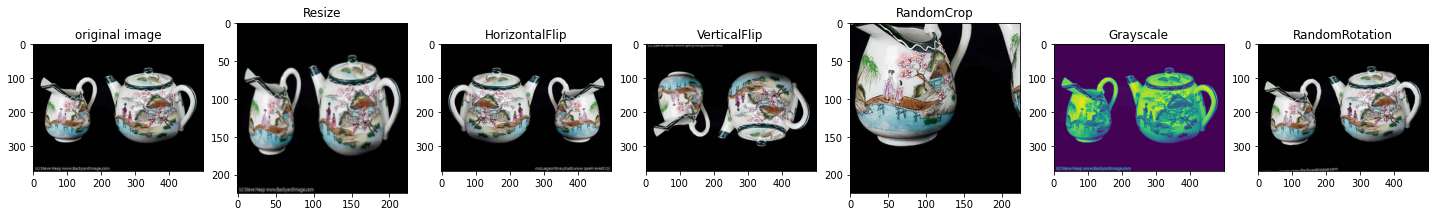

In [ ]:
# Transform 
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/drive/MyDrive/Colab_Notebooks/images/n04398044_teapot.jfif')

A_transform = transforms.Resize((224, 224))
B_transform = transforms.RandomHorizontalFlip(p=1)
C_transform = transforms.RandomVerticalFlip(p=1)
D_transform = transforms.RandomCrop((224, 224))
E_transform = transforms.Grayscale()
F_transform = transforms.RandomRotation(30)
transforms_list = [A_transform, B_transform, C_transform, D_transform, E_transform, F_transform]
transforms_name = ['Resize', 'HorizontalFlip', 'VerticalFlip', 'RandomCrop', 'Grayscale', 'RandomRotation']

fig, subplots = plt.subplots(1, 7, figsize=(25,5))
ax = subplots.flat[0]
ax.imshow(img)
ax.set_title('original image')

for i in range(6):
  trans_img = transforms_list[i](img)
  ax = subplots.flat[i+1]
  ax.imshow(trans_img)
  ax.set_title(transforms_name[i])

In [ ]:
transform_train = transforms.Compose([
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

train_dataset = datasets.CIFAR10('data', train=True, transform=transform_train, download=True)
test_dataset = datasets.CIFAR10('data', train=False, transform=transform_test, download=True)

num_classes = len(train_dataset.classes)
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=1)


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
train_dataset, test_dataset

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: data
     Split: Train
     StandardTransform
 Transform: Compose(
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
            ), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
            ))

##### data visualize

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

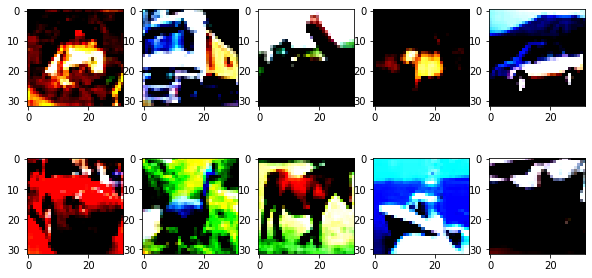

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
  image, label = train_dataset[i]
  image = image.permute(1, 2, 0)
  plt.subplot(2, 5, i+1)
  plt.imshow(image)

### Model 

ResNet18

In [ ]:
model = models.resnet18(num_classes=num_classes)
model = model.cuda()
# model = model.to(device) if device = 'cuda'

In [ ]:
from torchsummary import summary

summary(model, (3, 32, 32))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]          36,864
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
       BasicBlock-11             [-1, 64, 8, 8]               0
           Conv2d-12             [-1, 64, 8, 8]          36,864
      BatchNorm2d-13             [-1, 64, 8, 8]             128
             ReLU-14             [-1, 6

### Loss Function & Optimizer

* Mixup and Labelsmoothing

1) Mixup 

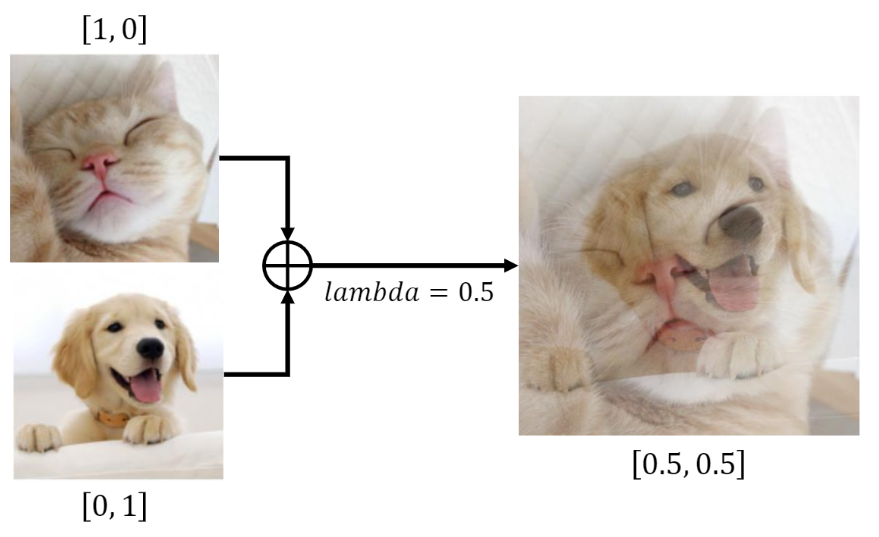

2) Labelsmoothing

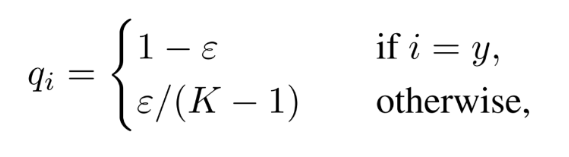

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

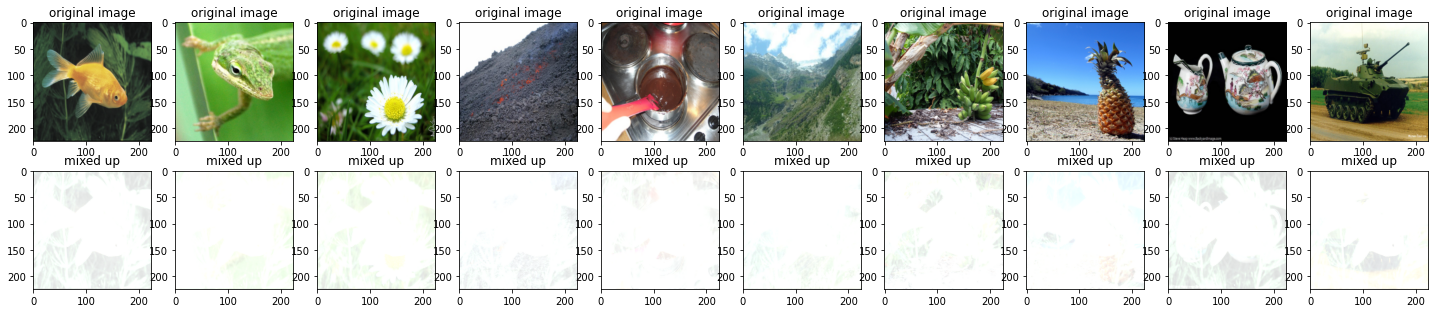

In [ ]:
# mixup 예제
import glob, os, cv2

mixup_alpha = 1.0

images_list = glob.glob(os.path.join('/content/drive/MyDrive/Colab_Notebooks/images/', '*.jfif'))
images = []

transform = transforms.Compose([(transforms.Resize((224, 224))), transforms.ToTensor()])

for i in range(10):
  image = Image.open(images_list[i])
  images.append(transform(image))

images = torch.stack(images)

lam = np.random.beta(mixup_alpha, mixup_alpha)
batch_size = images.size()[0]
mixed_x = lam * images + (1-lam) + images[0]

fig, subplots = plt.subplots(2, 10, figsize=(25, 5))
for i in range(10):
  ax1 = subplots.flat[i]
  ax2 = subplots.flat[i+10]
  ax1.imshow(images[i].permute(1, 2, 0))
  ax2.imshow(mixed_x[i].permute(1, 2, 0))
  ax1.set_title(f'original image')
  ax2.set_title(f'mixed up')

In [ ]:
mixup_alpha = 1.0

def mixup_data(x, y):
    lam = np.random.beta(mixup_alpha, mixup_alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).cuda()
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

class LabelSmoothingCrossEntropy(torch.nn.Module):
    def __init__(self):
        super(LabelSmoothingCrossEntropy, self).__init__()
    def forward(self, y, targets, smoothing=0.1):
        confidence = 1. - smoothing
        log_probs = F.log_softmax(y, dim=-1) # 예측 확률 계산
        true_probs = torch.zeros_like(log_probs)
        true_probs.fill_(smoothing / (y.shape[1] - 1))
        true_probs.scatter_(1, targets.data.unsqueeze(1), confidence) # 정답 인덱스의 정답 확률을 confidence로 변경
        return torch.mean(torch.sum(true_probs * -log_probs, dim=-1)) # negative log likelihood

* Scheduler

1) LambdaLR

2) MultiplicativeLR

3) StepLR

4) MultistepLR

5) ExponentialLR

6) CosineAnnealingLR

7) ReduceLROnPlateau

8) CyclicLR

9) OneCycleLR

10) CosineAnnealingWarmRestarts


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


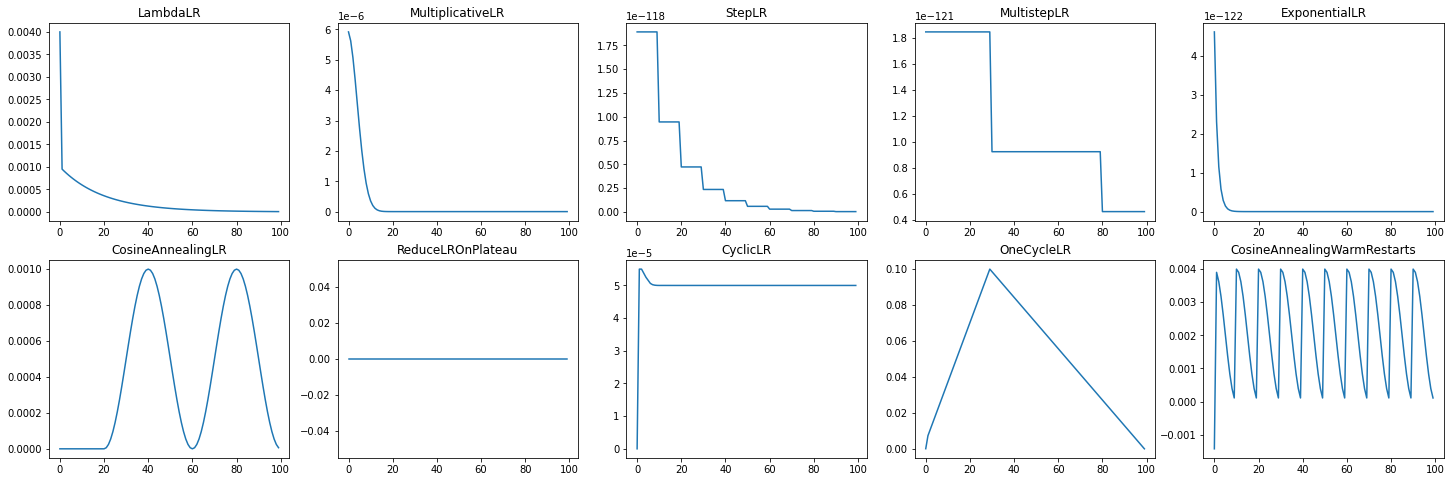

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler

def plot_lr(optimizer, scheduler, epoch=100, val_loss=None):
  lr_list = []
  for i in range(epoch):
    lr = optimizer.param_groups[0]["lr"]
    lr_list.append(lr)
    scheduler.step(val_loss)
  return lr_list


optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = [lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch), 
             lr_scheduler.MultiplicativeLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.95 ** epoch),
             lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5),
             lr_scheduler.MultiStepLR(optimizer, milestones=[30, 80], gamma=0.5),
             lr_scheduler.ExponentialLR(optimizer, gamma=0.5),
             lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0),
             lr_scheduler.ReduceLROnPlateau(optimizer, 'min'),
             lr_scheduler.CyclicLR(optimizer, base_lr=0.00005, step_size_up=5, max_lr=0.0001, gamma=0.5, mode='exp_range'),
             lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=10, anneal_strategy='linear'),
             lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=1, eta_min=0.00001)]
scheduler_name = ['LambdaLR', 'MultiplicativeLR', 'StepLR', 'MultistepLR', 'ExponentialLR', 
                  'CosineAnnealingLR', 'ReduceLROnPlateau', 'CyclicLR', 'OneCycleLR', 'CosineAnnealingWarmRestarts']

fig, subplots = plt.subplots(2, 5, figsize=(25, 8))
for i in range(10):
  ax = subplots.flat[i]
  if scheduler_name[i] == 'ReduceLROnPlateau':
    lr_list = plot_lr(optimizer, scheduler[i], val_loss=0.5)
  else:
    lr_list = plot_lr(optimizer, scheduler[i])
  ax.plot(lr_list)
  ax.set_title(scheduler_name[i])

In [ ]:
criterion = LabelSmoothingCrossEntropy()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=500, eta_min=0)

### Training

In [ ]:
# without mixup
max_epoch = 200
model.train()
acc = 0

for epoch in range(max_epoch):
  total_loss = 0
  total = 0
  correct = 0
  pbar = tqdm(total=int(len(train_dataset) / batch_size), disable=False)
  for i, data in enumerate(train_loader):
    inputs, labels = data[0].cuda(), data[1].cuda()
    # inputs, targets_a, targets_b, lam = mixup_data(inputs, labels)
    optimizer.zero_grad()

    outputs = model(inputs)
    # loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    
    _, pred = outputs.max(1)
    total += labels.size(0)
    # current_correct = (lam * pred.eq(targets_a).sum().item() + (1-lam)*pred.eq(targets_b).sum().item())
    # correct += current_correct
    correct += pred.eq(labels).sum().item()


    pbar.set_description(
        f'[TRAIN] Epoch: {epoch+1}. Iteration: {i+1}/{int(len(train_dataset) / batch_size)+1}. LR: {optimizer.param_groups[0]["lr"]:.3f}.'
        f'Loss: {loss.item() / labels.size(0):.3f}. Accuracy: {correct / total:.2f}'
    )
    pbar.update()

  scheduler.step()
  pbar.close()
print(f'Train Done [Epoch] {max_epoch} / Loss: {total_loss / total} / Accuracy: {correct / total}')

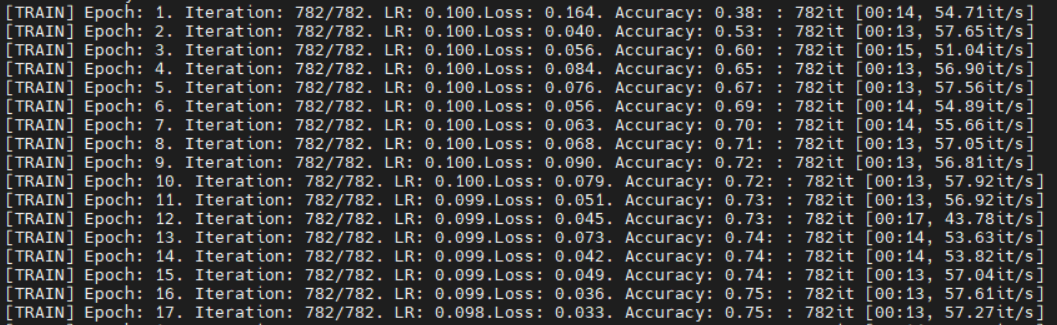

### Model save

In [ ]:
torch.save(model.state_dict(), f'resnet18.pth')
# torch.save(model, f'resnet18.pth')

### Evaluation

In [ ]:
model = models.resnet18(num_classes=num_classes)
model = model.cuda()
model.load_state_dict(torch.load('/content/drive/MyDrive/Colab_Notebooks/checkpoint/resnet18.pth'))
# model = torch.load('/content/drive/MyDrive/Colab_Notebooks/checkpoint/resnet18.pth')

In [ ]:
model.eval()
criterion = torch.nn.CrossEntropyLoss().cuda()
 
with torch.no_grad():
  loss_val = 0
  num_correct = 0
  total = 0
  pbar = tqdm(total=int(len(test_dataset) / batch_size), disable=False)
  for i, data in enumerate(test_loader):
    inputs, labels = data[0].cuda(), data[1].cuda()
    total += labels.size(0)

    outputs = model(inputs)
    cost = criterion(outputs, labels)
    loss_val += cost.item()

    _, preds = torch.max(outputs, 1)
    num_correct += preds.eq(labels).sum().item()
    pbar.update()
  pbar.close()

print(f'Validation Loss: {loss_val / (len(test_dataset)/batch_size):.2f}. Accuracy: {num_correct / len(test_dataset) * 100:.1f}%')